<a href="https://colab.research.google.com/github/ZahraEk/Digital-Image-Proccesing/blob/main/DIP_EXC3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q3 :

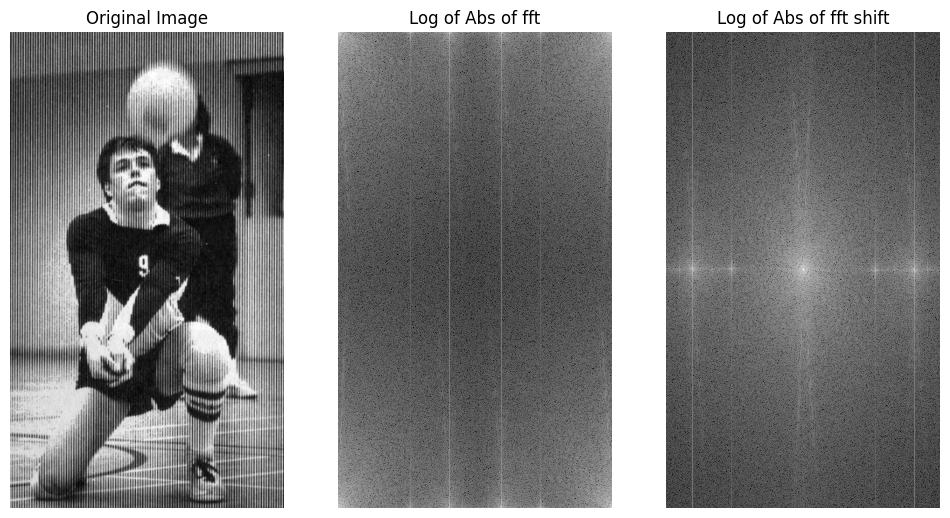

In [4]:
#Read image
img = cv2.imread("drive/MyDrive/DIP_EXC3/Q3/Q3_img.jpg",0)

#Compute the Fourier transform
fft = np.fft.fft2(img)
S_fft = np.log(1+np.abs(fft))

#Shift the Fourier transform
fft_shift = np.fft.fftshift(fft)
fft_shift = np.log(1+np.abs(fft_shift))

#Show images
f, ax = plt.subplots(1,3,figsize=(12,14))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(S_fft, cmap='gray')
ax[1].set_title("Log of Abs of fft")
ax[1].axis('off')
ax[2].imshow(fft_shift ,cmap='gray')
ax[2].set_title("Log of Abs of fft shift")
ax[2].axis('off')

plt.show()

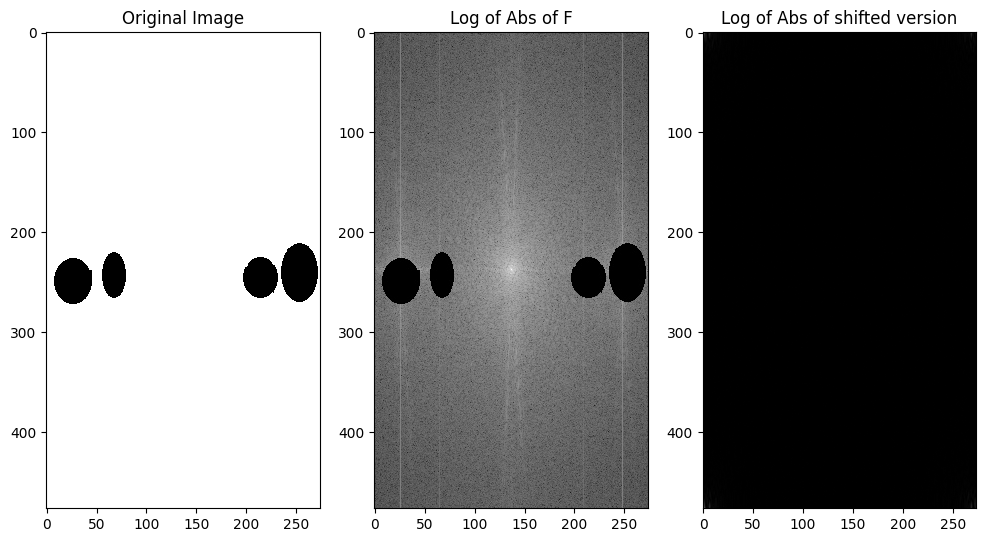

In [ ]:
mask = cv2.imread("drive/MyDrive/DIP_EXC3/Q3/mask.jpg",0) 

# convert the input image to grayscale
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(mask,70,255,0)

# Apply the mask to the Fourier transform
filtered_Fc = fft_shift * mask
S4 = np.log(1 + np.abs(filtered_Fc))

# Shift the filtered Fourier transform back
filtered_F = np.fft.ifftshift(filtered_Fc)

# Compute the inverse Fourier transform to obtain the filtered image
filtered_image = np.fft.ifft2(filtered_F)
filtered_image = np.abs(filtered_image).astype(np.uint8)

"""
filtered_fft = S_shift * mask
filtered_image = np.fft.ifft2(filtered_fft)
filtered_image = np.abs(filtered_image).astype(np.uint8)
"""

#Show images
f, subplt2 = plt.subplots(1,3,figsize=(12,8))

subplt2[0].imshow(thresh,cmap='gray')
subplt2[0].set_title("Original Image")
subplt2[1].imshow(filtered_Fc,cmap='gray')
subplt2[1].set_title("Log of Abs of F")
subplt2[2].imshow(filtered_image,cmap='gray')
subplt2[2].set_title("Log of Abs of shifted version")

plt.show()
